<a href="https://colab.research.google.com/github/subhashdevarasetty677/Churn-Modelling-Ann/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.12.0


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


this the problem of binary classification we need to find the person is going to exit the account or not

In [ ]:
# dependent and independent feature

x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
# Feature enginering and data cleaning

geogr=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
## concatinate these variable swith dataframes

x=x.drop(['Geography','Gender'],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
x=pd.concat([x,geogr,gender],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
## part two lets create an ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [ ]:
   #### lets initialize the ANN

   classifier=Sequential()

In [ ]:
# Adding the input layer

classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding first hidden layer

classifier.add(Dense(units=7,activation = 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
##Adding the second hiddden layer

classifier.add(Dense(units=6,activation = 'relu'))

# New Section

In [ ]:
## Adding the output layer

classifier.add(Dense(units=1,activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## early stopping keras
import tensorflow as tf

early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3076 - accuracy: 0.8703 - val_loss: 0.4184 - val_accuracy: 0.8470
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3038 - accuracy: 0.8739 - val_loss: 0.4204 - val_accuracy: 0.8459
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.8742 - val_loss: 0.4033 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3038 - accuracy: 0.8712 - val_loss: 0.4362 - val_accuracy: 0.8425
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.8729 - val_loss: 0.4280 - val_accuracy: 0.8417
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3030 - accuracy: 0.8722 - val_loss: 0.4255 - val_accuracy: 0.8410
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3011 - accuracy: 0.8714 - val_loss: 0.4387 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

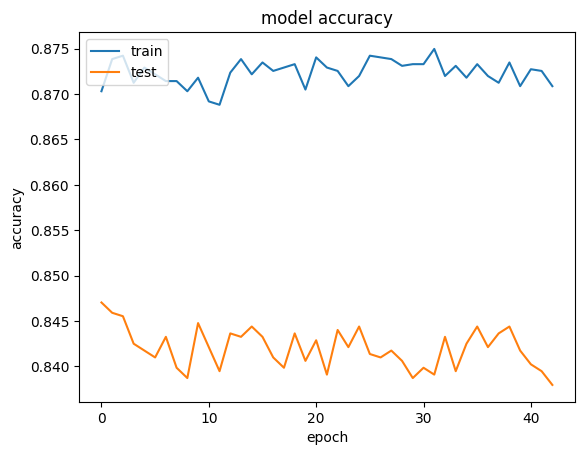

In [ ]:
## plotting the keys of my model
## summariz ethe history of accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


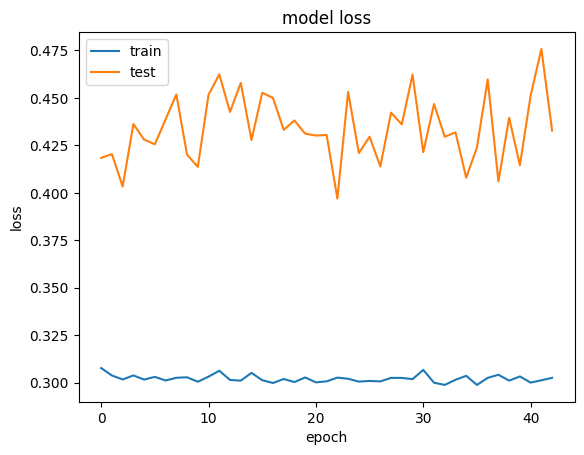

In [ ]:
## summariz ethe history of loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
## part 3 prediction the test data

# predicting the test results

y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
## make the consfusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 243,  162]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.849

In [ ]:
## get the weights


classifier.get_weights()

[array([[-2.0018704e+00, -7.1485537e-01,  1.4182338e+00, -4.8763324e-02,
          1.8706031e+00, -1.9747522e+00, -2.1738317e+00,  5.1459199e-01,
         -4.2450118e+00, -3.2915297e-01,  2.8298694e-01],
        [ 3.6878443e+00, -5.1678705e+00, -7.1429496e+00,  3.4454103e+00,
         -3.5853887e+00, -5.4476581e+00, -6.9321030e-01,  4.9103184e+00,
          9.7926217e-01, -1.3248587e+00, -2.4492352e+00],
        [-1.6880511e+00,  6.1888814e-01, -1.0818461e+00,  2.0323913e+00,
          2.9702265e+00,  1.5560074e+00,  1.4846184e+00,  7.6766074e-01,
          9.7652709e-01,  5.7046044e-01, -7.4635458e-01],
        [ 3.5665803e+00, -5.5096751e-01, -1.6503562e+00, -1.1323722e-01,
         -5.0881171e+00, -9.7613639e-01, -4.0604753e+00, -1.1738681e+00,
         -5.6100907e+00,  8.2726961e-01, -3.8907011e+00],
        [-6.9071209e-01, -2.5693042e+00,  6.2641902e-03,  5.4458094e+00,
         -8.2644261e-02,  1.4888352e+00, -8.3469324e+00,  1.5698175e-01,
          3.5282272e-01,  6.2755527e+0